In [617]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import random

In [618]:
range_of_TT = []
i = 0.5
while i < 10.5:
    range_of_TT.append(i)
    i += 0.5
print(range_of_TT)
print(len(range_of_TT))

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
20


In [619]:

random.seed(589015328) # this seed should not be changed in order to reproduce result
TT = int(5e5)

temperature = 10
numebr_amino_acids = 15
end_of_protein = numebr_amino_acids-1

In [620]:
direction = np.zeros(numebr_amino_acids, dtype =int) # initial chain is a straight line
protein_coordinate = []
coordinate_over_time = []
distance_over_time = []
energy_over_time  =  [0.0]
J = np.zeros((20, 20))
protein_sq = []

In [621]:
def sequence_N_integers(N):
    #array of numbers between 1-20, values represent type of amino acid, can repeat
    return [random.randrange(0,20) for _ in range(N)]
protein_sq = sequence_N_integers(numebr_amino_acids)
print(protein_sq)

[0, 9, 9, 8, 2, 14, 9, 16, 0, 15, 19, 8, 13, 13, 3]


In [622]:
def distance(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2+(y2-y1)**2)

In [623]:
def diagonal_nigbour(x1, y1):
    up_right = [x1 + 1, y1 + 1]
    down_right= [x1 + 1, y1 - 1]
    down_left = [x1 - 1, y1 - 1]
    up_left = [x1 - 1, y1 + 1]
    return [up_right, down_right, down_left, up_left]

In [624]:
def direct_nigbour(x1,y1):
    up= [x1 , y1 + 1]
    down= [x1 , y1 - 1]
    left = [x1 - 1, y1 ]
    right = [x1 - 1, y1]
    return [up, down, left, right]

In [625]:
def initial_J():
    for i in range(20):
        for j in range(20):
            if (j>=i):
                J[i,j] = random.uniform(-4.0, -2.0)
                J[j,i] = J[i,j]
initial_J()
#J[1,12] == J[12,1] # True
#J
print(J.size)

400


In [626]:

def initial_protein():
    return [[i,10] for i in range(numebr_amino_acids)]

protein_coordinate.append(initial_protein())
protein_coordinate[0][0][1]
print(protein_coordinate[0])

[[0, 10], [1, 10], [2, 10], [3, 10], [4, 10], [5, 10], [6, 10], [7, 10], [8, 10], [9, 10], [10, 10], [11, 10], [12, 10], [13, 10], [14, 10]]


In [627]:
# def total_e(squence, energy, coordinate, t):
#     total = 0
#     for i in range(numebr_amino_acids):
#         temp_protien_type = squence[i]
#         temp_coord = direct_nigbour(coordinate[t][i][0],coordinate[t][i][1])
#         for j in range(i, numebr_amino_acids):
            


In [628]:
def overlap(x,y,t):
    return [x, y] in protein_coordinate[t]
#overlap(1,11,0) # False

In [629]:
def check_i_zero_break(i, t,new_x,new_y):
    next_amino_x = protein_coordinate[t][i + 1][0]
    next_amino_y = protein_coordinate[t][i + 1][1]
    return (distance(next_amino_x,next_amino_y,new_x,new_y) != 1)
    

In [630]:
def check_i_last_break(i, t,new_x,new_y):
    before_amino_x = protein_coordinate[t][i - 1][0]
    before_amino_y = protein_coordinate[t][i - 1][1]
    return (distance(before_amino_x,before_amino_y,new_x,new_y) != 1)

In [631]:
def check_i_middle_break(i,t,new_x,new_y):
    next_amino_x = protein_coordinate[t][i + 1][0]
    next_amino_y = protein_coordinate[t][i + 1][1]
    before_amino_x = protein_coordinate[t][i - 1][0]
    before_amino_y = protein_coordinate[t][i - 1][1]
    return(distance(next_amino_x,next_amino_y,new_x,new_y) != 1 or distance(before_amino_x,before_amino_y,new_x,new_y) != 1)

In [632]:
# for k in direct_nigbour(new_x,new_y):
#         if([next_amino_x,next_amino_y] == k):
#             return True
#         if(k not in protein_coordinate[t]):
#             return True

In [633]:
def check_new_e_zero(i,t,new_x,new_y):
    en = 0
    for pos in direct_nigbour(new_x,new_y): 
        if (pos in protein_coordinate[t]):
            index_next = protein_coordinate[t].index(pos)
            if(index_next == i + 1 ):
                continue
            else:
                en += J[protein_sq[i],protein_sq[index_next]]
        return en

In [634]:
def check_new_e_last(i,t,new_x,new_y):
    en = 0
    for pos in direct_nigbour(new_x,new_y): 
        if (pos in protein_coordinate[t]):
            index_next = protein_coordinate[t].index(pos)
            if(index_next == i - 1 ):
                continue
            else:
                en += J[protein_sq[i],protein_sq[index_next]]
        return en

In [635]:
def check_new_e_middle(i,t,new_x,new_y):
    en = 0
    for pos in direct_nigbour(new_x,new_y): 
        if (pos in protein_coordinate[t]):
            index_next = protein_coordinate[t].index(pos)
            if index_next in [i - 1, i + 1]:
                continue
            else:
                en += J[protein_sq[i],protein_sq[index_next]]
        return en

In [636]:
def one_or_zero(i,j):
    if(i+ 1 == j or i - 1 == j):
        return 0
    else:
        return 1

In [637]:
def total_e(t):
    tot_e = 0
    for i in range(len(protein_coordinate[t])):
        #temp_e = 0
        for j in direct_nigbour(protein_coordinate[t][i][0],protein_coordinate[t][i][1]):
            if (j in protein_coordinate[t]) and (
                (
                    protein_coordinate[t].index(j) != (i + 1)
                    or protein_coordinate[t].index(j) != (i - 1)
                )
            ):
                tot_e += J[protein_sq[i],protein_sq[protein_coordinate[t].index(j)]]
    return tot_e/2.0

In [638]:
energy_vs_temp_energy = []
energy_vs_temp_temp = []
energy_vs_temp_length = []



In [639]:
for temper in range_of_TT:
    #new_e = 0
    for t in range(TT): # time or generatation 
        total_delta_e = 0
        new_coord = protein_coordinate[t] # [[],[],[]...,[]]
        #loop throught entire protein
        for i in range(numebr_amino_acids):
            #print(protein_coordinate[t][i][0])
            temp_x = protein_coordinate[t][i][0] # x coordinate for 1st protein in generation t
            temp_y = protein_coordinate[t][i][1] # y coordinate for 1st protein in generation t
            random_dia = diagonal_nigbour(temp_x, temp_y)[random.randrange(4)]
            new_x = random_dia[0]
            new_y = random_dia[1]

            # check overlap
            if overlap(new_x, new_y, t):
                continue

            #check break or not
            if (i == 0):
                if check_i_zero_break(i,t,new_x,new_y):
                    continue
                e_1 = check_new_e_zero(i,t,new_x,new_y) 
                e_2 = check_new_e_zero(i,t,temp_x,temp_y)
                delta_e = e_1 - e_2            #   print(delta_e)
                if (delta_e < 0):
                    new_coord[i] = [new_x,new_y]
                    total_delta_e += delta_e
                elif min(1, np.exp(-delta_e/temper))>np.random.random():
                    new_coord[i] = [new_x,new_y]
                    total_delta_e += delta_e


            elif (i > 0 and i < numebr_amino_acids - 1):
                if check_i_middle_break(i,t,new_x, new_y):
                    continue
                e_1 = check_new_e_middle(i,t,new_x,new_y) 
                e_2 = check_new_e_middle(i,t,temp_x,temp_y)
                delta_e = e_1 - e_2
                if (delta_e < 0):
                    new_coord[i] = [new_x,new_y]
                    total_delta_e += delta_e
                elif min(1, np.exp(-delta_e/temper))>np.random.random():
                    new_coord[i] = [new_x,new_y]
                    total_delta_e += delta_e

            elif i == (numebr_amino_acids - 1):
                if check_i_last_break(i,t,new_x,new_y):
                    continue
                e_1 = check_new_e_last(i,t,new_x,new_y) 
                e_2 = check_new_e_last(i,t,temp_x,temp_y)
                delta_e = e_1 - e_2
                if (delta_e < 0):
                    new_coord[i] = [new_x,new_y]
                    total_delta_e += delta_e
                elif min(1, np.exp(-delta_e/temper))>np.random.random():
                    new_coord[i] = [new_x,new_y]
                    total_delta_e += delta_e
                        # update protein coordinate
        #new_e += total_delta_e /2.0
        protein_coordinate.append(new_coord)
        # update everything after each generation
        # update end to end distance 
        
        if t %10 == 0:
            energy_over_time.append(total_e(t))
            temp_dis = distance(protein_coordinate[t][0][0],protein_coordinate[t][0][1], protein_coordinate[t][-1][0],protein_coordinate[t][-1][1])
            distance_over_time.append(temp_dis)
        coordinate_over_time.append(new_coord)
    energy_vs_temp_energy.append(np.mean(energy_over_time[round(-0.1*len(energy_over_time)):]))
    energy_vs_temp_length.append(np.mean(distance_over_time[round(-0.1*len(distance_over_time)):]))



In [640]:
#print(energy_vs_temp_energy)
#print(energy_vs_temp_length)
print(energy_vs_temp_energy[round(-0.1*len(energy_vs_temp_energy))])

-53.67281322711533


In [641]:
# ls  = [[],[]]
# ls[0] = [1,2]
# ls[1] = [2,3]
# print(ls)

In [642]:
#print(coordinate_over_time[-1])
#print(distance_over_time)
#print(energy_over_time[22000:23000])

In [643]:
# turn delta over time to total energy over time
# for i in range(len(energy_over_time)):
#     if i == 0:
#         energy_over_time[i] = energy_over_time[i]
#     else:
#         energy_over_time[i] = energy_over_time[i-1] + energy_over_time[i]
#print(energy_over_time)

In [644]:
every_nth_dis = distance_over_time[::100]
every_nth_energy = energy_over_time[::100]

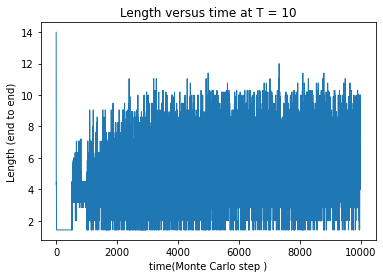

In [645]:
plt.plot(range(len(every_nth_dis)),every_nth_dis,linewidth=1.0)
plt.title('Length versus time at T = 10')
plt.xlabel("time(Monte Carlo step )")
plt.ylabel('Length (end to end)')
plt.show()

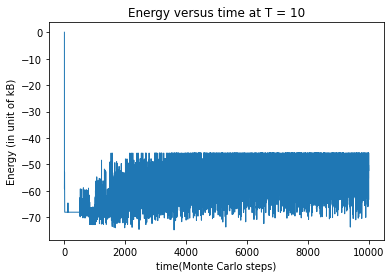

In [646]:
plt.plot(range(len(every_nth_energy)),every_nth_energy,linewidth=1.0)
plt.title('Energy versus time at T = 10')
plt.xlabel("time(Monte Carlo steps)")
plt.ylabel('Energy (in unit of kB)')
plt.show()

In [647]:
x = []
y = []
for i in range(len(protein_coordinate[-1])):
    x.append(protein_coordinate[-1][i][0])
    y.append(protein_coordinate[-1][i][1])
print(x)
print(y)
protein = np.array(protein_sq)

[57, 57, 57, 57, 57, 57, 57, 58, 59, 59, 59, 60, 60, 60, 59]
[1867, 1868, 1869, 1870, 1871, 1872, 1873, 1873, 1873, 1872, 1871, 1871, 1870, 1869, 1869]


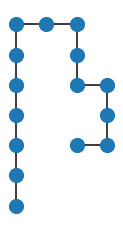

In [648]:
plt.plot(x, y, 'k-', zorder=1)  # straight lines
# large dots colored via the 'tab20' colormap, set zorder=3 to draw the dots on top of the lines
plt.scatter(x, y,  s=200, zorder=3) 

plt.axis('off') # don't show the axes
plt.margins(0.1) # enough margin so that the large scatter dots don't touch the borders
plt.gca().set_aspect('equal') # equal distances in x and y direction 
plt.show()

In [649]:
# range_of_TT = range(1,10)
# print(type(range_of_TT))
# for i in range_of_TT:
#     print(i)

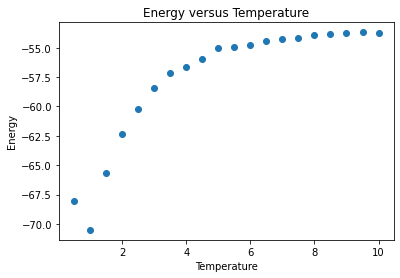

In [650]:
plt.scatter(range_of_TT,energy_vs_temp_energy)
plt.title('Energy versus Temperature')
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.show()

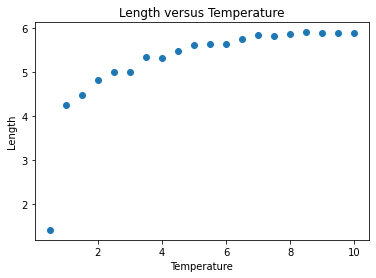

In [651]:
plt.scatter(range_of_TT,energy_vs_temp_length)
plt.title('Length versus Temperature')
plt.xlabel('Temperature')
plt.ylabel('Length')
plt.show()

In [652]:
print(energy_vs_temp_energy)
print(energy_vs_temp_length)

[-68.03184063016069, -70.5165684753142, -65.63845721263972, -62.306923371662116, -60.2519512883033, -58.41221311920344, -57.17682932160744, -56.63641496960154, -55.92164177934831, -55.02047286779728, -54.93139091322384, -54.7880685755287, -54.45163342955864, -54.23735629865467, -54.17795099110069, -53.9393779961737, -53.84796183221534, -53.77725546823985, -53.67281322711533, -53.69911166190207]
[1.4151508206732986, 4.26189018580299, 4.486675150108817, 4.8217820720041225, 5.009841011320953, 4.996358440109432, 5.337612425128892, 5.3222149100190554, 5.47085421155975, 5.622994421183738, 5.64575360020617, 5.624167631181298, 5.751580156544284, 5.830983833082986, 5.812171956549803, 5.87337922406513, 5.902148921687635, 5.881779272789326, 5.882442779661764, 5.889059227149346]


In [653]:
# plt.scatter([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5],energy_vs_temp_energy)
# plt.title('energy versus tmeperature')
# plt.xlabel('temperature')
# plt.ylabel('energy')
# plt.show()

In [654]:
# kk = [-0.00013988086586254306, -0.0003763852195512058, -0.0010215348538788632, -0.001732411217159116, -0.0022648166355634432, -0.0026561819455760798, -0.002907458958205845, -0.003073721750444946, -0.0031788175487762623, -0.003237958646745721, -0.003265276506123856, -0.0032648516003949937, -0.00326604562958725, -0.003245407875636301, -0.0032225093634406206, -0.003190996284202452, -0.0031543240576433385, -0.003115285080018983, -0.00307876413161694]
# nega = [ 2.4343476026947743, 4.168491422997082,4.281471283060433,4.371593369198875,4.831503063025529,5.06363054282866,5.246292275291572,5.36077726826828,5.518729802455272,5.479080781898463,5.49472902895095,5.497549749157742,5.545730594417403, 5.5500302302759374, 5.550226792902141, 5.550982769782327, 5.548013649961362, 5.544550698281002]
# yup = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0]
# plt.scatter(yup,nega)
# plt.title('length versus tmeperature')
# plt.xlabel('temperature')
# plt.ylabel('length')
# plt.show()